# **Sum Pixels in the IrrMapper Data**

Purpose: The purpose of this script is to sum to total pixels in an IrrMapper and compare the timeseries of the total pixels. IrrMapper only has pixels with irrigation. All other pixels are nonexistant. Therefore, a sum of pixels with a value (1) will create the total pixels present

In [ ]:
## Install Packages ##

!pip install geopandas #install geopandas, will allow import of .shp files
import geopandas as gpd 
import numpy as np #general array computations
import matplotlib.pyplot as plt #to plot data, works with rasterio
!pip install rasterio
import rasterio as rso #to import Geotiff files
from PIL import Image #to work with Geotiff files
!pip install xarray 
import xarray as xr #for stacking arrays of Geotiffs to reduce computation time
import scipy as sc
import io
import netCDF4 #to work with xarray and geopandas
import os
!pip install rtree
import rtree #need to clip .shp files with geopands
!pip install pygeos
import pygeos
!pip install shapely
import shapely #validate geometry of irrigation districts for self-intersections
import fiona #dependency for geopandas
import pyproj #dependency for geopandas
import pandas as pd #dependency for geopandas
import geopy #dependency for geopandas
!pip install rioxarray #to clip rasters to a .shp file
import rioxarray as rxr

In [2]:
## Connect to server

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
## Go into content space
%cd /content/gdrive/MyDrive/spatial_colab/datasets/

/content/gdrive/MyDrive/spatial_colab/datasets


In [9]:
## Import the image and irrigation companies
lbrb_bounds = gpd.read_file('LBRB_shp/LBRB_file.shp')
irig_comp = gpd.read_file('irrigation_companies/irrigation_companies.shp')

# open all IrrMapper files and put them in one array
dirname = 'IrrMapper' #this is the folder for the .tif files
irrmapper = [] #array where the .tif files will be stored
for fname in os.listdir(dirname): #lists the names of the files in the folder of dirname (ie. CDL_subsets)
  im = rxr.open_rasterio(os.path.join(dirname, fname)) #joins the folder name with the name of the tif file to open tif files
  imarray = xr.DataArray(im) #creates a numpy array of the on of the tif files
  irrmapper.append(imarray) #adds the tif files into the imarray variable like a list

irrmapper = np.asarray(irrmapper) #compiles all the arrays into one array

In [74]:
#Determine the shape and number of dimensions in the array
print(irrmapper.shape)
print(irrmapper.ndim)
print(np.max(irrmapper[0,:,:])) #all values are either 1 or 0

(35, 1, 2366, 4620)
4
1


In [66]:
## Add all the pixels with a value to sum total pixels irrigated 

pixel_count = [] #create an array for the total number of pixels to go into

for i in range(0,34,1): #call each year, which is first dimension in array
  count = ((np.sum(irrmapper[i,:,:])*900/1000000)/3341)*100
  #One pixel has a resolution of 30m, so one pixel is 900m^2
  #Convert m^2 to km^2
  #Total area in Lower Boise River Basin = ~3341 km^2
  pixel_count.append(count)

[45.975561209218796, 40.886102963184676, 40.699799461239145, 43.453002095181084, 44.51471116432206, 44.161257108650105, 34.74921281053577, 43.664842861418734, 41.26140377132595, 45.871580365160135, 40.9331906614786, 43.49839269679737, 43.46299610894941, 42.634624363962885, 40.71792876384316, 38.632116132894346, 40.63172702783598, 38.21799760550733, 39.249185872493264, 37.27128703980844, 36.86783597725232, 35.38912601017659, 38.60765639030231, 36.55481592337623, 38.701293026040105, 41.43469619874289, 39.4644477701287, 41.233361269081115, 41.322768632146065, 38.078700987728226, 42.73954803950913, 39.57492068243042, 39.65406465130201, 42.61695300808142]


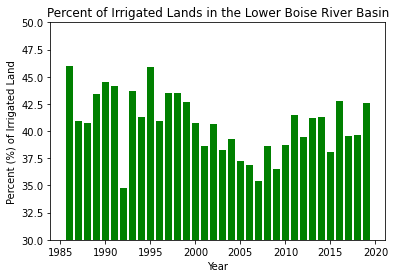

In [73]:
#plot the number of pixels against the year

years = range(1986, 2020, 1)

plot = plt.bar(years, pixel_count, color='green')
plt.ylabel('Percent (%) of Irrigated Land')
plt.ylim(30,50)
plt.xlabel('Year')
plt.title('Percent of Irrigated Lands in the Lower Boise River Basin')
plt.show()